<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *Section1 Project*

---
<br>

# **어떤 게임을 설계해야 할까?**

## 프로젝트 목표 
- 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답했는가?
- 연도별 게임의 트렌드가 있을까 라는 질문에 대답했는가?
- 인기가 많은 게임에 대한 분석 및 시각화 프로세스가 포함되었는가?
- 다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론이 제시되었는가?

<br>

---

## 목차

- **Part 0. 상황 설정**  
  0-1. 기획 배경  
  0-2. 데이터 설명  

- **Part 1. Cleaning Data**  
  1-1. 데이터 정제  
  1-2. Feature Engineering

- **Part 2. Data Analysis**    
  2-1. 지역에 따라서 선호하는 게임 장르가 다른가?  
  2-2. 연도별 게임의 트렌드가 있는가?  
  2-3. 인기가 많은 게임에 대한 분석

- **Part 3. Business Insight and Conclusion**  
  3-1. 도출된 Business Insight 정리  
  3-2. 결론 : 어떤 게임을 설계해야 하는가? 

# **Part 0. 상황 설정**


## **0-1. 기획 배경**

- 한 게임 회사에 신입 데이터 직군으로 입사해서 처음 업무를 받게 되었다.
- 업무 내용은 주어진 데이터를 가지고 이번 분기 회의에 도움이 될만한 인사이트를 도출하라는 것이었다.
- 회의의 핵심 주제는 앞으로 우리 회사가 해외에 진출할 때 어떤 장르의 게임을 어떤 플랫폼에 내는게 좀 더 전략적인 선택이 될 수 있을지를 결정하는 것이다.
- 그것을 위해 **연도별 장르의 수요 공급 트렌드, 출시 플랫폼의 변화, 성공한 게임들에 대한 벤치마킹 등의 정보**를 얻어내는게 목표이다.
- 설명을 듣는 대상은 **`비데이터 직군` 으로서 전문용어를 최대한 배제하고 알기 쉬운 용어로 설명하고자 한다.**

## **0-2. 데이터 설명**

- 원본 데이터는 ***https://www.vgchartz.com/*** 에서 수집하였다.
- 제공되는 데이터의 각 변수들의 이름과 설명은 다음과 같다.

#### **Base Feature Description**  
- `Name` : 게임의 이름입니다.
- `Platform` : 게임이 지원되는 플랫폼의 이름입니다.
- `Year` : 게임이 출시된 연도입니다.
- `Genre` : 게임의 장르입니다.
- `Publisher` : 게임을 배급한 회사입니다.
- `NA_Sales` : 북미지역에서의 출고량입니다.
- `EU_Sales` : 유럽지역에서의 출고량입니다.
- `JP_Sales` : 일본지역에서의 출고량입니다.
- `Other_Sales` : 기타지역에서의 출고량입니다.

#### **Optional Feature Description**  
- `Total_Sales` : 전체지역 출고량의 합계입니다.
- `region` : 게임의 출고량이 제일 많았던 지역입니다.
- `series` : 같은 게임이 다른 연도에 재발매된 횟수를 의미합니다.

# **Part 1. Cleaning Data**

기본 데이터를 불러와서 분석하기 쉽도록 여러가지 가공을 거치는 단계.<br>
이 부분은 설명 대상 (비데이터 직군)에게 자세하게 설명할 필요는 없을 것이지만<br>
협업하게 될 동료를 위해 어떤 과정을 통해서 처리하였는지 정리해두도록 하였다. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('mode.chained_assignment',  None) # 경고를 끈다

In [3]:
# 데이터 업로드
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2 (1).csv


In [5]:
# .read_csv() 활용하여 데이터 불러오기
df_game = pd.read_csv('vgames2.csv', index_col = 0)
df_game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03



## **1-1. 데이터 정제**  

기본 데이터의 문제점을 찾아내서 수정한다.  
이 데이터에는 다음과 같은 문제점들이 있다.

- **Year** 
  - 연도 데이터는 `integer` 이어야 함
  - 몇몇 연도 데이터는 앞의 두자리가 생략되었다. 따라서 네자리수로 수정해야 한다.  
  - 첫 비디오 게임이 1972년도에 발매된 것을 고려해 72-99 사이의 값은 1972-1999로  
   나머지 값은 20xx 년의 형태로 바꿔주도록 한다.
- **NA_Sales, EU_Sales, JP_Sales, Other_Sales**
    - 단위가 통일되어 있지 않으므로 통일해 주도록 한다.
    - 출처 사이트 검색 결과, 생략된 단위는 M(million) 이다.
    - K 단위 표기는 1/1000 scale로 수정해서 M 단위로 통일한다.
    - 이후 계산을 위해 단위 표기는 생략하였다.
- **결측값, 중복값**
  - Year, Genre, Publisher 세 feature들은 결측값이 존재한다.
  - 동일 Name, Genre, Year를 가진 게임은 동일한 게임으로 간주한다.
  - Name과 Genre가 같거나, Name과 Year만 같은 게임도 동일한 게임으로 추정할 수 있다.
  - 이를 이용해 결측값을 보충하고 보충되지 않는 나머지 결측값은 제거한다.
  - Publisher는 분석에 있어 그렇게 중요하지 않은 데이터라 간주해  
  결측값은 기존 카테고리에 있는 Unknown으로 변환한다.
  - 중복값은 제거한다.

In [6]:
df_clean = df_game.copy() # 원본 데이터 보존
pd.set_option('mode.chained_assignment',  None) # 경고를 끈다

In [7]:
# 각 지역의 Sales 단위 통일을 위해 float 형태가 아닌 값들을 검색
import re

def has_errors(inputString):
  return bool(re.search('[^.\d+]', inputString))

In [8]:
# 각 지역 Sales 에 섞여 있는 오류 데이터를 확인

error_NA = df_clean['NA_Sales'].apply(has_errors)
error_EU = df_clean['EU_Sales'].apply(has_errors)
error_JP = df_clean['JP_Sales'].apply(has_errors)
error_Other = df_clean['Other_Sales'].apply(has_errors)

error_Sales = df_clean[error_NA | error_EU | error_JP | error_Other]

In [9]:
# M 단위로 Scaling

def convert(sales):
  if 'K' in sales:
    sales = float(sales.replace('K',''))
    sales = 0.001 * sales
  elif 'M' in sales:
    sales = float(sales.replace('M',''))
  else:
    float(sales)

  return sales

In [10]:
# Sales 단위 통일

df_clean['NA_Sales'] = df_clean['NA_Sales'].apply(convert).astype('float')
df_clean['EU_Sales'] = df_clean['EU_Sales'].apply(convert).astype('float')
df_clean['JP_Sales'] = df_clean['JP_Sales'].apply(convert).astype('float')
df_clean['Other_Sales'] = df_clean['Other_Sales'].apply(convert).astype('float')

df_clean 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [11]:
# Year, Genre, Publisher에 결측값 존재

df_null = df_clean[df_clean.Year.isnull() | df_clean.Genre.isnull() | df_clean.Publisher.isnull()] # 결측값이 존재하는 data
df_null

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21
51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0.00,0.00,0.02,0.00
273,UK Truck Simulator,PC,2010.0,Simulation,NaN,0.00,0.03,0.00,0.00
274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0.00,0.06,0.00,0.01
...,...,...,...,...,...,...,...,...,...
16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0.00,0.00,0.00
16432,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0.00,0.00,0.01
16433,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0.00,0.00,0.01
16556,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0.00,0.03,0.00,0.01


In [12]:
# 결측치 제거 전에 중복값 확인 (이름, 연도, 플랫폼의 쌍이 고유한 값)

df_clean[df_clean.duplicated(subset=['Name','Platform','Year'], keep = False)].sort_values('Name')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7347,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0.00,0.22
8718,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.00,0.00
8056,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.00,0.00,0.02,0.00
9185,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.00,0.00,0.02,0.00


In [13]:
# 중복값 제거

df_clean = df_clean.drop_duplicates(subset=['Name','Platform','Year'])
df_clean.duplicated(subset=['Name','Platform','Year']).sum()

0

In [14]:
# 이름이 중복되지만 연도에 결측치가 있는 data

no_year = df_clean[df_clean.duplicated('Name', keep=False) & df_clean.Year.isnull()].sort_values('Name')

# 이름이 중복인데 연도가 존재하는 data

yes_year = df_clean[df_clean.duplicated('Name', keep=False) & df_clean.Year.notnull()].sort_values('Name')

In [15]:
# 중복 이름인데 어떤건 연도가 있고, 어떤건 없는 게임들의 목록 (100개)

ny_year = list(set(no_year.Name).intersection(yes_year.Name)) 
df_ny_year = df_clean[df_clean.Name.isin(ny_year)].sort_values(['Name', 'Year'])

# 동일 게임은 동일 연도로 결측치를 채워줌

df_ny_year.Year = df_ny_year.Year.fillna(method = 'ffill')
df_ny_year

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7311,AKB1/48: Idol to Guam de Koishitara...,PSP,2011.0,Misc,Namco Bandai Games,0.00,0.00,0.40,0.00
11642,AKB1/48: Idol to Guam de Koishitara...,X360,2011.0,Misc,NaN,0.00,0.00,0.01,0.00
4058,Aquaman: Battle for Atlantis,GC,2003.0,Action,TDK Mediactive,0.01,0.00,0.00,0.00
7151,Aquaman: Battle for Atlantis,XB,2003.0,Action,Unknown,0.01,0.00,0.00,0.00
2458,Battle vs. Chess,X360,2011.0,Misc,TopWare Interactive,0.00,0.03,0.00,0.00
...,...,...,...,...,...,...,...,...,...
6119,Wheel of Fortune,PS2,2010.0,Misc,Unknown,0.47,0.36,0.00,0.12
6132,Without Warning,PS2,2005.0,Shooter,Capcom,0.02,0.01,0.00,0.00
15777,Without Warning,XB,2005.0,Shooter,Capcom,0.01,0.00,0.00,0.00
28,World of Tanks,PC,2011.0,Shooter,Wargaming.net,0.00,0.23,0.00,0.06


In [16]:
# 이름이 중복되지만 장르에 결측치가 있는 data

no_genre = df_clean[df_clean.duplicated('Genre', keep=False) & df_clean.Genre.isnull()].sort_values('Name')

# 이름이 중복인데 장르가 존재하는 data

yes_genre = df_clean[df_clean.duplicated('Genre', keep=False) & df_clean.Genre.notnull()].sort_values('Name')

In [17]:
# 중복 이름인데 어떤건 연도가 있고, 어떤건 없는 게임들의 목록 (20개)

ny_genre = list(set(no_genre.Name).intersection(yes_genre.Name)) 
df_ny_genre = df_clean[df_clean.Name.isin(ny_genre)].sort_values(['Name', 'Genre'])

# 동일 게임은 동일 장르로 결측치를 채워줌

df_ny_genre.Genre = df_ny_genre.Genre.fillna(method = 'ffill')
df_ny_genre

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3847,Apache: Air Assault,PS3,2010.0,Simulation,Activision,0.11,0.07,0.00,0.03
11357,Apache: Air Assault,X360,2010.0,Simulation,Activision,0.12,0.04,0.00,0.01
16556,Apache: Air Assault,PC,2010.0,Simulation,Just Flight,0.00,0.03,0.00,0.01
1211,Back to the Future: The Game,PS3,2011.0,Adventure,Telltale Games,0.07,0.01,0.00,0.01
2687,Back to the Future: The Game,PS4,2015.0,Adventure,Telltale Games,0.10,0.04,0.00,0.03
...,...,...,...,...,...,...,...,...,...
16212,The Mummy: Tomb of the Dragon Emperor,PS2,2008.0,Action,Vivendi Games,0.12,0.10,0.00,0.03
10433,The Mummy: Tomb of the Dragon Emperor,Wii,2008.0,Action,Vivendi Games,0.08,0.00,0.00,0.01
11004,Time Travelers,PSP,2012.0,Adventure,Level 5,0.00,0.00,0.01,0.00
12236,Time Travelers,3DS,2012.0,Adventure,Unknown,0.00,0.00,0.04,0.00


In [18]:
# Publisher의 결측값을 'Unknown' 으로 대체

df_null['Publisher'] = df_null['Publisher'].fillna('Unknown')
df_null

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21
51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0.00,0.00,0.02,0.00
273,UK Truck Simulator,PC,2010.0,Simulation,Unknown,0.00,0.03,0.00,0.00
274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0.00,0.06,0.00,0.01
...,...,...,...,...,...,...,...,...,...
16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0.00,0.00,0.00
16432,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0.00,0.00,0.01
16433,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0.00,0.00,0.01
16556,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0.00,0.03,0.00,0.01


In [19]:
# 변경된 결측값을 각각 데이터에 반영

df_clean.Year = df_clean.Year.fillna(df_ny_year.Year)
df_clean.Genre = df_clean.Genre.fillna(df_ny_genre.Genre)
df_clean.Publisher = df_clean.Publisher.fillna(df_null.Publisher)


In [20]:
# 남은 결측값 제거

df_clean = df_clean.dropna(axis=0)
df_clean[df_clean.Year.isnull() | df_clean.Genre.isnull() | df_clean.Publisher.isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [21]:
# 연도를 수정하는 함수

def fix_year(year):
  if year >= 70 and year < 100:
    return int(year+1900)
  elif year <= 25:
    return int(year+2000)
  else:
    return int(year)

df_clean['Year'] = df_clean.Year.apply(fix_year)

In [22]:
# 1차 전처리가 끝난 dataframe
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03



## **1-2. Feature Engineering**  

추후 용이한 분석을 위해 기존 Feature 들을 조합해 새로운 Feature를 만들었다.

- **Total_Sales** 
  - 게임의 총 판매량으로 `NA_Sales, EU_Sales, JP_Sales, Other_Sales` 들의 합으로 계산된다.

- **region** 
  - 게임이 제일 잘 팔린 지역을 의미한다.  
  어떤 게임의 `JP_Sales`가 `NA_Sales, EU_Sales, Other_Sales` 보다 높다면 JP를 표기하는 방식으로 NA, JP, EU, Other 4가지 분류로 구성되어 있다.

- **series**
  - 같은 게임이 다른 연도에 재발매된 횟수를 의미한다.  
  같은 게임이 여러번 재발매 되었다면 그만큼 인기 게임이라는 증명이기도 하다.



In [23]:
# 각 지역의 Sales의 합계를 의미하는 Total_Sales column을 추가

df_clean['Total_Sales'] = df_clean.iloc[:, 5:9].sum(axis=1)

# 지역(region) 라벨링

df_clean['region'] = df_clean.iloc[:,5:9].idxmax(axis=1)
df_clean['region'] = df_clean['region'].str.replace('_Sales','')

In [24]:
# 각 게임의 series 발매 횟수

years = df_clean.groupby(['Name'])['Year'].nunique().reset_index(name='Years') # 각 게임의 발매 회수
df_clean = pd.merge(df_clean, years, on='Name', how='left') # 발매 회수를 column에 추가
df_clean.rename(columns={'Years':'series'},inplace=True) # column 이름을 series 변경

In [25]:
# Feature가 추가된 dataframe
df = df_clean.copy()
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,region,series
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,NA,1
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,NA,1
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,JP,1
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,NA,1
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,NA,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16415,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,NA,1
16416,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,NA,1
16417,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,NA,1
16418,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,JP,1



# **Part 2. Data Analysis**

  2-1. 지역에 따라서 선호하는 게임 장르가 다른가?  
  2-2. 연도별 게임의 트렌드가 있는가?  
  2-3. 인기가 많은 게임에 대한 분석

의 순서에 따라 시각화 및 통계적 검정을 통해 차례대로 가설에 대해 설명하고자 한다.


## **2-1. 지역에 따라서 선호하는 게임 장르가 다른가?**  

- NA, EU, JP, Other 는 각각 북미, 유럽, 일본, 기타 지역을 의미한다. 이를 통해 지역에 따른 분석이 가능하다.
- 예를 들어 JP_Sales가 다른 세 column보다 높다면 **'일본에서 많이팔렸다'** 고 해석 가능하다.
- 장르에 따라 지역별 평균 판매량의 분포가 유의미하게 다르다면 지역에 따라 선호하는 장르가 다르다고 할 수 있다.
- 장르와 제일 잘 팔리는 지역간 상관관계가 있는지 유무로도 판단해볼 수 있다. 


In [26]:
# 각 지역의 장르별 평균 판매량

df_mean_sales_genre_table = df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].mean().transpose()
df_mean_sales_genre_table

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,0.265085,0.080063,0.263294,0.234110,0.508527,0.213958,0.289765,0.217046,0.447733,0.213224,0.292103,0.101126
EU_Sales,0.159019,0.050079,0.119120,0.122657,0.229612,0.088494,0.192076,0.124683,0.241241,0.132743,0.161215,0.066889
JP_Sales,0.047721,0.040801,0.103627,0.061163,0.149007,0.098494,0.045685,0.233778,0.029453,0.074490,0.057983,0.072785
Other_Sales,0.056782,0.013119,0.043092,0.042459,0.058744,0.021874,0.062393,0.038659,0.079098,0.036776,0.057768,0.016741


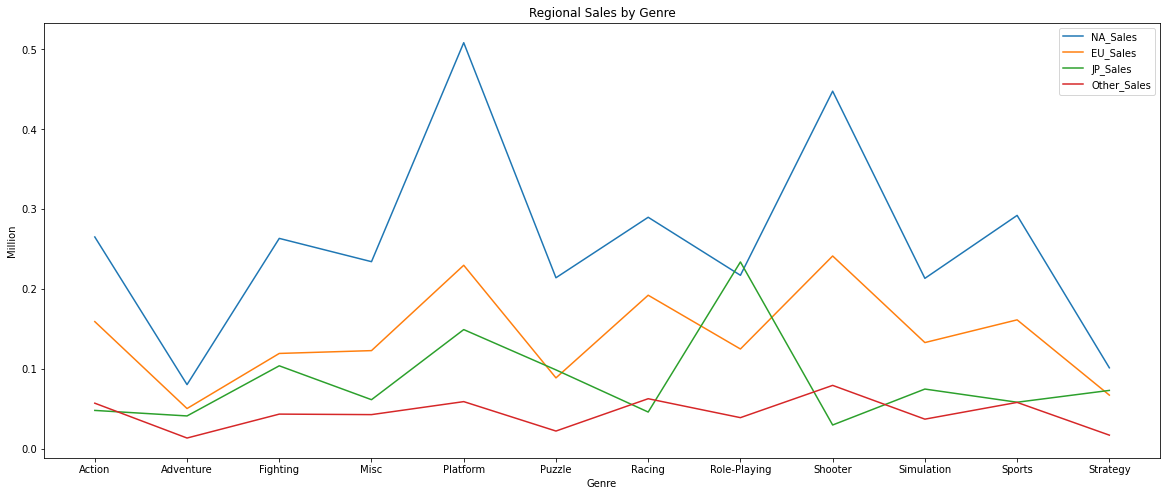

In [27]:
plt.figure(figsize=(20, 8))
plt.plot(df_mean_sales_genre_table.T)
plt.legend(df_mean_sales_genre_table.index)
plt.xlabel('Genre')
plt.ylabel('Million')
plt.title('Regional Sales by Genre')
plt.show();

- 얼핏보면 각 지역마다 판매량이 비슷한듯 하지만 Role-Playing 장르의 판매량에서 일본 지역의 특이성을 관찰할 수 있다.  
- 다만 이것은 지역간의 구매능력을 고려하지 않은 순수 판매량의 차이를 나타내는 그래프이다.  
- 따라서 각 지역간의 구매력을 고려한 백분율 그래프로 재 시각화한다.

In [28]:
# 각 지역의 장르별 총 판매량
df_total_sales_genre_table = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].groupby('Genre').sum().transpose()

# 지역마다 구매력의 차이를 고려해 '비율' 로 다시 시각화한다.
df_sales_genre_table_percentile = df_total_sales_genre_table.div(df_total_sales_genre_table[df_total_sales_genre_table.columns].sum(axis = 1),axis = 0)
df_sales_genre_table_percentile

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,0.199945,0.023423,0.050889,0.092541,0.102378,0.028077,0.082110,0.073276,0.133459,0.041800,0.156415,0.015687
EU_Sales,0.216075,0.026394,0.041476,0.087345,0.083275,0.020920,0.098052,0.075831,0.129542,0.046879,0.155517,0.018693
JP_Sales,0.122994,0.040788,0.068439,0.082613,0.102505,0.044165,0.044236,0.269687,0.029998,0.049898,0.106094,0.038582
Other_Sales,0.235941,0.021143,0.045882,0.092459,0.065151,0.015813,0.097397,0.071899,0.129884,0.039716,0.170410,0.014306


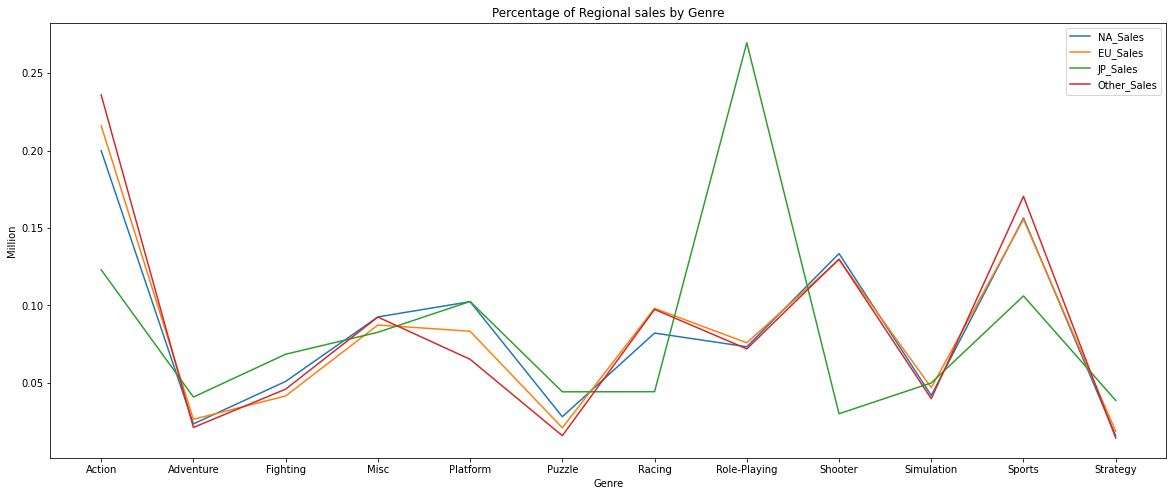

In [29]:
plt.figure(figsize=(20, 8))
plt.plot(df_sales_genre_table_percentile.T)
plt.legend(df_sales_genre_table_percentile.index)
plt.xlabel('Genre')
plt.ylabel('Million')
plt.title('Percentage of Regional sales by Genre')
plt.show();

일본을 제외한 3개 지역간 장르의 판매 비율은 거의 비슷한 것을 볼 수 있다.  
가령 다른 세 지역과 일본이 가장 차이를 보이는 Action, Shooter, Role-Playing 에 대해서 t-test를 수행하면

In [30]:
from scipy.stats import levene, ttest_ind

# 예를 들어 Role-Playing 에 대해서 지역간 t-test를 수행해보면
df_Sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']]
df_percentile = df_Sales.div(df_Sales[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].sum(axis = 0),axis = 1)
NA_RPG = df_percentile[df.Genre=='Role-Playing'].NA_Sales
JP_RPG = df_percentile[df.Genre=='Role-Playing'].JP_Sales
EU_RPG = df_percentile[df.Genre=='Role-Playing'].EU_Sales
Other_RPG = df_percentile[df.Genre=='Role-Playing'].Other_Sales

print('---'*20, '\n')
print(levene(NA_RPG,JP_RPG,EU_RPG,Other_RPG ),'\n') # CLT에 의해 정규성 가정, but 등분산성 가정 위배
print('---'*20, '\n')

# 등분산성을 만족하지 못하는 2개의 그룹에 대한 ttest_ind()에는 equal_var=False 옵션을 추가.

print('JP를 제외한 나머지 지역간 동일성 t-test의 p-value :',(ttest_ind(NA_RPG, EU_RPG, equal_var=False).pvalue, ttest_ind(NA_RPG, Other_RPG, equal_var=False).pvalue, ttest_ind(EU_RPG, Other_RPG, equal_var=False).pvalue ), '\n')
print('---'*20, '\n')

print('JP와 나머지 지역간 동일성 t-test의 p-value :',(ttest_ind(NA_RPG, JP_RPG, equal_var=False).pvalue, ttest_ind(JP_RPG, EU_RPG, equal_var=False).pvalue, ttest_ind(JP_RPG, Other_RPG, equal_var=False).pvalue), '\n')
print('---'*20, '\n')

------------------------------------------------------------ 

LeveneResult(statistic=70.26616166339682, pvalue=1.220341930590804e-44) 

------------------------------------------------------------ 

JP를 제외한 나머지 지역간 동일성 t-test의 p-value : (0.790298823520463, 0.8652939024407693, 0.6785857712545393) 

------------------------------------------------------------ 

JP와 나머지 지역간 동일성 t-test의 p-value : (6.117024437184193e-22, 2.2154007346649596e-20, 2.505040535921869e-22) 

------------------------------------------------------------ 



In [31]:
# Action 에 대해서 지역간 t-test를 수행해보면

NA_Action = df_percentile[df.Genre=='Action'].NA_Sales
JP_Action = df_percentile[df.Genre=='Action'].JP_Sales
EU_Action = df_percentile[df.Genre=='Action'].EU_Sales
Other_Action = df_percentile[df.Genre=='Action'].Other_Sales

print('---'*20, '\n')
print(levene(NA_Action,JP_Action,EU_Action,Other_Action ),'\n') # CLT에 의해 정규성 가정, but 등분산성 가정 위배
print('---'*20, '\n')

# 등분산성을 만족하지 못하는 2개의 그룹에 대한 ttest_ind()에는 equal_var=False 옵션을 추가.

print('JP를 제외한 나머지 지역간 동일성 t-test의 p-value :',(ttest_ind(NA_Action, EU_Action, equal_var=False).pvalue, ttest_ind(NA_Action, Other_Action, equal_var=False).pvalue, ttest_ind(EU_Action, Other_Action, equal_var=False).pvalue ), '\n')
print('---'*20, '\n')

print('JP와 나머지 지역간 동일성 t-test의 p-value :',(ttest_ind(NA_Action, JP_Action, equal_var=False).pvalue, ttest_ind(JP_Action, EU_Action, equal_var=False).pvalue, ttest_ind(JP_Action, Other_Action, equal_var=False).pvalue), '\n')
print('---'*20, '\n')

------------------------------------------------------------ 

LeveneResult(statistic=15.203228968057692, pvalue=7.130465443015604e-10) 

------------------------------------------------------------ 

JP를 제외한 나머지 지역간 동일성 t-test의 p-value : (0.18832865828626535, 0.05835859970894352, 0.32028776804566705) 

------------------------------------------------------------ 

JP와 나머지 지역간 동일성 t-test의 p-value : (2.776649224175082e-13, 2.5682684434352927e-14, 2.7889880969925377e-09) 

------------------------------------------------------------ 



In [32]:
# Shooter 에 대해서 지역간 t-test를 수행해보면

NA_Shooter = df_percentile[df.Genre=='Shooter'].NA_Sales
JP_Shooter = df_percentile[df.Genre=='Shooter'].JP_Sales
EU_Shooter = df_percentile[df.Genre=='Shooter'].EU_Sales
Other_Shooter = df_percentile[df.Genre=='Shooter'].Other_Sales

print('---'*20, '\n')
print(levene(NA_Shooter,JP_Shooter,EU_Shooter,Other_Shooter ),'\n') # CLT에 의해 정규성 가정, but 등분산성 가정 위배
print('---'*20, '\n')

# 등분산성을 만족하지 못하는 2개의 그룹에 대한 ttest_ind()에는 equal_var=False 옵션을 추가.

print('JP를 제외한 나머지 지역간 동일성 t-test의 p-value :',(ttest_ind(NA_Shooter, EU_Shooter, equal_var=False).pvalue, ttest_ind(NA_Shooter, Other_Shooter, equal_var=False).pvalue, ttest_ind(EU_Shooter, Other_Shooter, equal_var=False).pvalue ), '\n')
print('---'*20, '\n')

print('JP와 나머지 지역간 동일성 t-test의 p-value :',(ttest_ind(NA_Shooter, JP_Shooter, equal_var=False).pvalue, ttest_ind(JP_Shooter, EU_Shooter, equal_var=False).pvalue, ttest_ind(JP_Shooter, Other_Shooter, equal_var=False).pvalue), '\n')
print('---'*20, '\n')

------------------------------------------------------------ 

LeveneResult(statistic=33.86055508993106, pvalue=1.1496503067818568e-21) 

------------------------------------------------------------ 

JP를 제외한 나머지 지역간 동일성 t-test의 p-value : (0.7620892470899845, 0.7917171189783372, 0.9778051332341984) 

------------------------------------------------------------ 

JP와 나머지 지역간 동일성 t-test의 p-value : (1.2654914269599097e-22, 4.5881904624785534e-29, 1.3053228572672361e-24) 

------------------------------------------------------------ 



일본을 제외한 나머지 지역간 Role-Playing, Action, Shooter 장르에 대해서는 동일성을 기각하지 못하지만   
일본과 나머지 세 지역간의 t-test 결과 p < 0.05 로 유의성이 있다고 판단, 동일성 가정을 기각할 수 있다.

**한마디로 지역마다 선호에는 차이가 있다고 볼 수 있다.**

그래프에 따르면 **일본은 Role-Playing, 나머지 세 지역은 Action** 장르의 인기가 높은 것을 알 수 있다.

추가적으로 `region` feature를 사용해서 지역별로 제일 잘 팔린 게임들의 분포를 pie chart로 그려보았다.

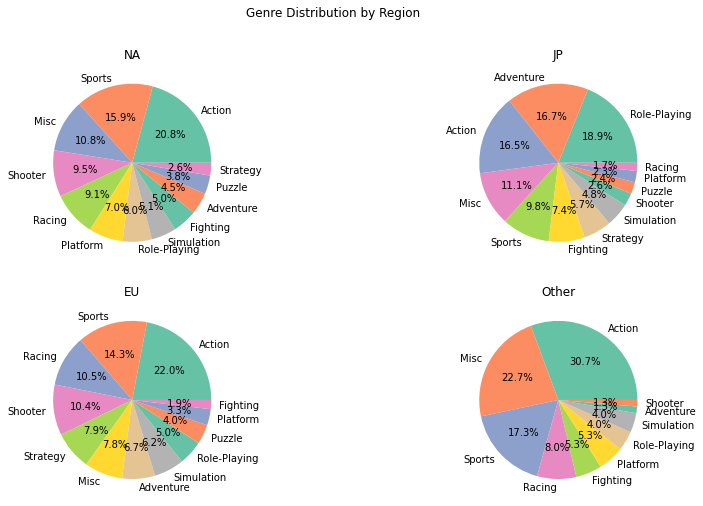

In [33]:
genre_counts = df.groupby('region')['Genre'].value_counts(normalize=True) # 각 지역마다 장르별 비율
genre_counts_plat = genre_counts.rename('percentage').reset_index()

region_dataframes = {region: genre_counts[region] for region in df['region'].unique()}

fig, axs = plt.subplots(2, 2, figsize=(14, 8))

i = 0
j = 0

for region in region_dataframes:
 
    counts = region_dataframes[region]

    sns.color_palette("Set2")
    axs[i, j].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
    axs[i, j].set_title(region)
    j += 1
    if j == 2:
        j = 0
        i += 1

fig.suptitle('Genre Distribution by Region')

plt.show();

지역별로 밀리언 셀러를 기록한 게임들만 따로 분류해서 pie chart로 나타내 보도록 한다.

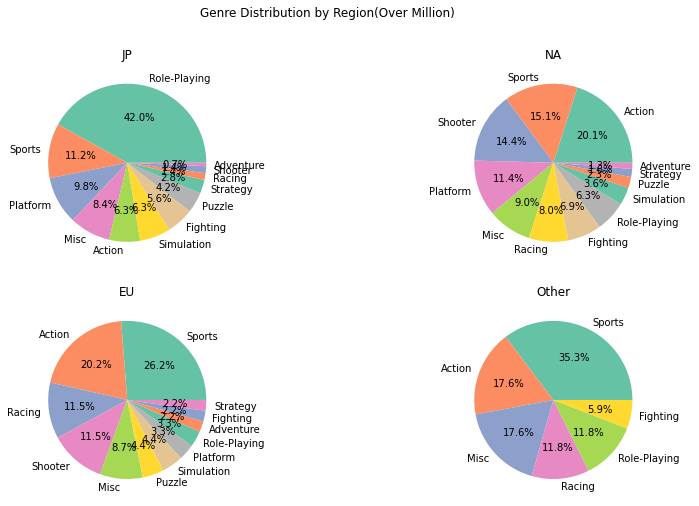

In [34]:
 # 지역별 밀리언셀러 판매량을 기록한 게임들

df_mil = df[(df.NA_Sales > 1) | (df.EU_Sales	 > 1) | (df.JP_Sales > 1) | (df.Other_Sales > 1)]

# 밀리언 셀러 기준으로 제일 잘팔린 지역들의 장르 비율

genre_counts_mil = df_mil.groupby('region')['Genre'].value_counts()

region_dataframes = {region: genre_counts_mil[region] for region in df_mil['region'].unique()}

fig, axs = plt.subplots(2, 2, figsize=(14, 8))

i = 0
j = 0
for region in region_dataframes:
    
    counts = region_dataframes[region]
  
    sns.color_palette("Set2")
    axs[i, j].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
    axs[i, j].set_title(region)
    j += 1
    if j == 2:
        j = 0
        i += 1

fig.suptitle('Genre Distribution by Region(Over Million)')

plt.show();

- 좀 더 지역간 특색이 크게 나타나는걸 볼 수 있다.  
- JP에서는 Role-Playing이, Other에서는 Sports가 강세를 띄는걸 볼 수 있다.  
- 또한 Other 지역에서 제일 잘 팔린 게임의 종류는 다른 지역에 비해 다양성이 적다. 
- 즉, 특정 장르들만 선호하는 경향이 더 강하다고도 볼 수 있다.

## **2-2. 연도별 게임의 트렌드가 있는가?**  

  연도별 트렌드를 파악하는 기준은 크게 네가지로 분류 가능하다.  

**1. 연도별 각 장르의 발매수**
  - 한 연도에 유달리 한 장르의 발매수가 높다면 그 연도에 게임 시장에서 그 장르에 대해서 그 게임을 많이 **「공급」**했다 고 볼 수 있을 것이다.
 
**2. 연도별 각 장르의 총 판매량**  
  - 반대로 한 연도에 한 장르의 판매수가 높다면, 그 연도에 그 장르에 대한 게임의 **「수요」**가 높다고 볼 수 있을 것이다.  

**3. 연도별 각 장르내 게임의 평균 판매량**  
  - 총 판매량은 총 발매수에 의해 왜곡될 수 있다.  
   따라서 판매의 효율성을 따져보기 위해서 평균 판매량 역시 고려되어야 한다.

**4. 연도별 출시 플랫폼 비율의 변화**  
 - 게임 플랫폼은 고전 게임기부터 현재 유행하는 최신식 게임기까지 발전과 변화를 거듭하고 있다.   
현재 제일 성장세가 높은 플랫폼이 무엇인지 알아내는 것이 우리 전략에 영향을 줄 것으로 쉽게 예상 가능하다.

In [35]:
# 연도별 장르 출시량
genre_per_year = df.groupby('Year')['Genre'].value_counts()
genre_per_year = genre_per_year.unstack().fillna(0)

# 연도별 최다 발매 장르
max_genre_per_year = genre_per_year.idxmax(axis=1)

# 연도별 최다 발매량
max_re_per_year = genre_per_year.max(axis=1)

# 연도별 최다 발매 장르와 그 발매 게임수
max_reliase_genre = pd.concat([max_genre_per_year, max_re_per_year.astype(int)], axis = 1, keys=['Genre','Reliase'])

In [36]:
# 연도별 각 장르의 평균 판매량
mean_sale_per_genre_year = df.groupby(['Year','Genre'])['Total_Sales'].mean().reset_index()

# 연도별 각 장르의 총 판매량
sum_sale_per_genre_year = df.groupby(['Year','Genre'])['Total_Sales'].sum().reset_index()

# 각 연도에서 제일 많이 팔린 장르

topsale_genre_of_each_year = sum_sale_per_genre_year.groupby('Year')['Total_Sales'].idxmax()
topgenre_of_each_year = sum_sale_per_genre_year[['Year','Genre','Total_Sales']].iloc[topsale_genre_of_each_year].set_index('Year')


In [37]:
# 각 연도에서 평균 판매량이 높은 장르

topmean_genre_of_each_year = mean_sale_per_genre_year.groupby('Year')['Total_Sales'].idxmax()
topmean_of_each_year = mean_sale_per_genre_year[['Year','Genre','Total_Sales']].iloc[topmean_genre_of_each_year].set_index('Year')


### **1. 연도별 각 장르의 발매수**

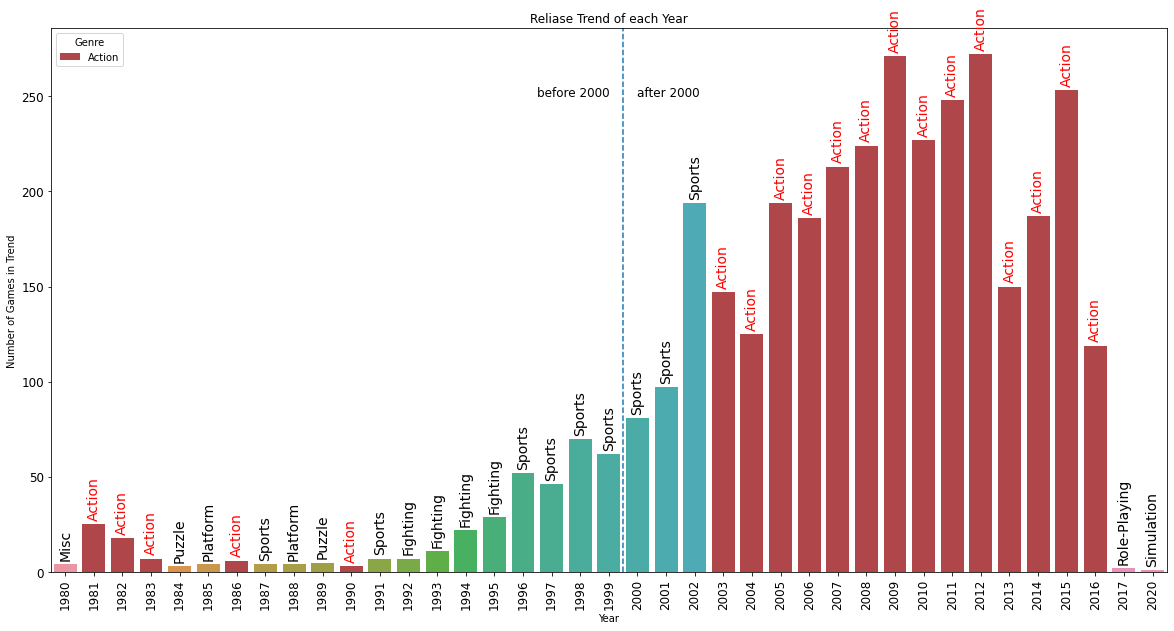

In [38]:
# 1. 연도별 각 장르의 발매수

plt.figure(figsize=(20,10))

sns.barplot(x=max_reliase_genre.index, y='Reliase', data=max_reliase_genre)
sns.barplot(x=max_reliase_genre.index, y='Reliase', hue='Genre', data=max_reliase_genre, hue_order=['Action'], palette = sns.color_palette("RdGy"))

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

idx = 0
for value in max_reliase_genre['Reliase']:
    plt.text(idx, value+2, str(max_reliase_genre.Genre.iloc[idx]), color = 'Red' if max_reliase_genre.Genre.iloc[idx] == 'Action' else 'black', rotation= 90, size=14, ha='center', va='bottom')
    idx += 1

plt.title('Reliase Trend of each Year')
plt.xlabel('Year')
plt.ylabel('Number of Games in Trend')
plt.axvline(x=19.5, linestyle='--')
plt.text(16.5, 250,'before 2000', fontsize=12)
plt.text(20, 250,'after 2000', fontsize=12)
plt.legend(title='Genre', loc='upper left')

plt.show();

### **2. 연도별 각 장르의 총 판매량**

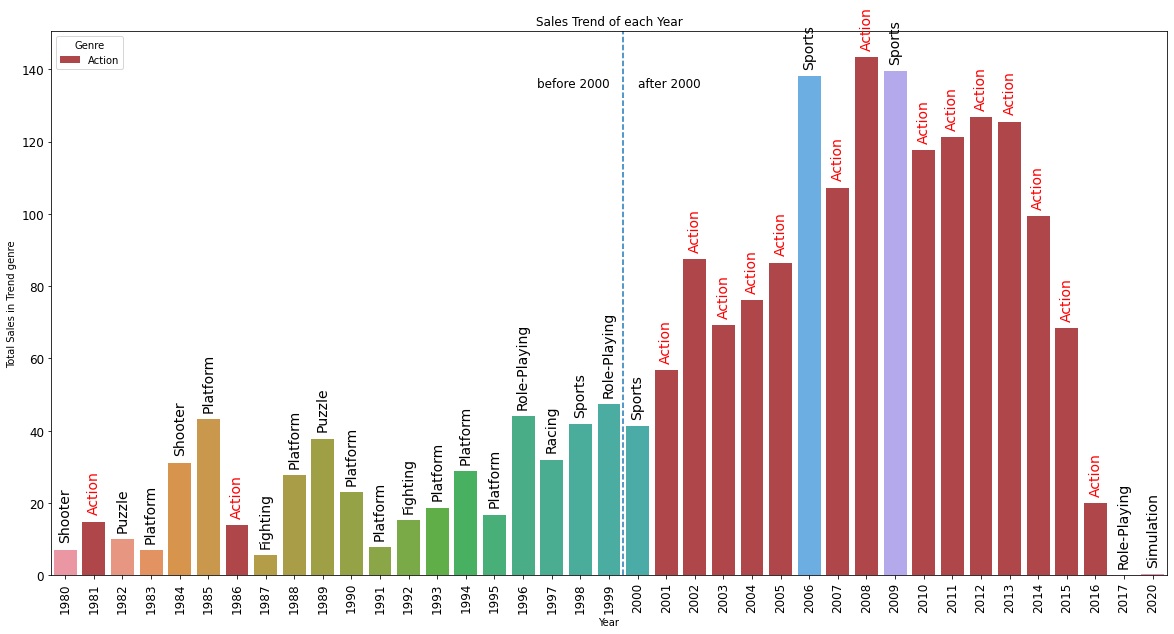

In [39]:
# 2. 연도별 각 장르의 총 판매량

plt.figure(figsize=(20,10))

sns.barplot(x=topgenre_of_each_year.index, y='Total_Sales', data=topgenre_of_each_year)
sns.barplot(x=topgenre_of_each_year.index, y='Total_Sales', hue='Genre', data=topgenre_of_each_year, hue_order=['Action'], palette = sns.color_palette("RdGy"))

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

idx = 0
for value in topgenre_of_each_year['Total_Sales']:
    plt.text(idx, value+2, str(topgenre_of_each_year.Genre.iloc[idx]), color = 'Red' if topgenre_of_each_year.Genre.iloc[idx] == 'Action' else 'black', rotation= 90, size=14, ha='center', va='bottom')
    idx += 1

plt.title('Sales Trend of each Year')
plt.xlabel('Year')
plt.ylabel('Total Sales in Trend genre')
plt.axvline(x=19.5, linestyle='--')
plt.text(16.5, 135,'before 2000', fontsize=12)
plt.text(20, 135,'after 2000', fontsize=12)
plt.legend(title='Genre', loc='upper left')

plt.show();

이에 따르면 **2000년대 이후에는 'Action' 게임이 시장을 지배하고 있다**고 할 수 있다.

다만 2006년 2009년에는 'Sports' 게임의 매출이 유독 높았음을 알 수 있다.

'Sports' 게임의 경우 올림픽, 월드컵 등의 특수를 받거나, 후술할 Wii Platform 열풍의 영향을 많이 받았기 때문에 높게 나왔다고 할 수 있다.

### **3. 연도별 각 장르내 게임의 평균 판매량**

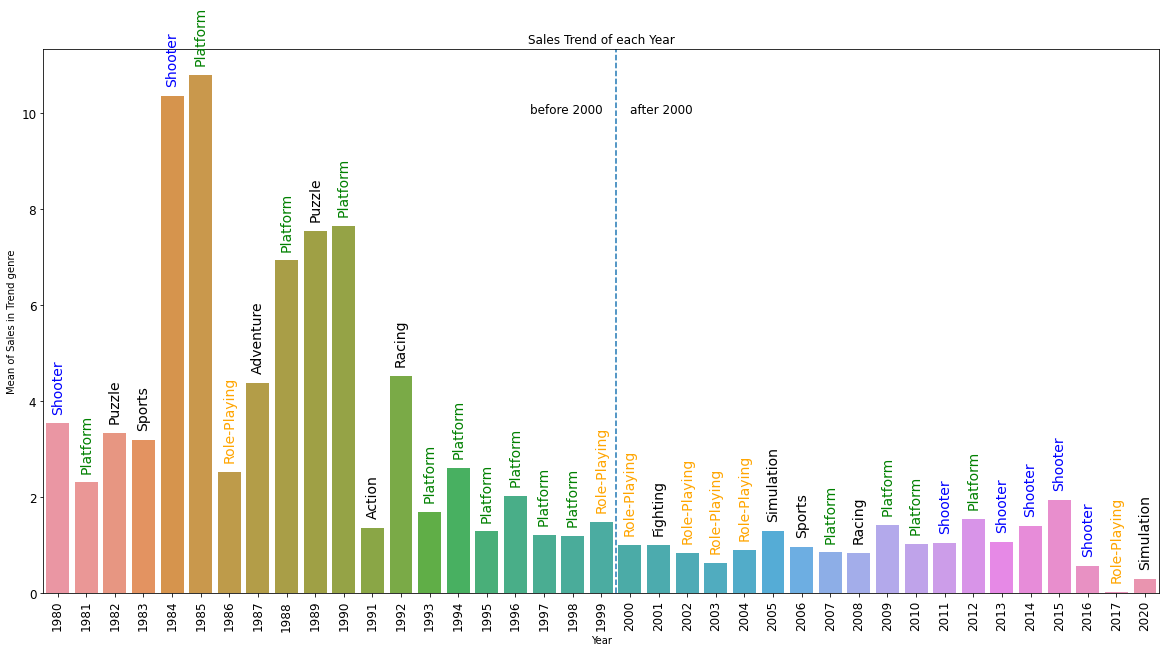

In [40]:
# 3. 연도별 각 장르내 게임의 평균 판매량

plt.figure(figsize=(20,10))

sns.barplot(x=topmean_of_each_year.index, y='Total_Sales', data=topmean_of_each_year)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

idx = 0
for value in topmean_of_each_year['Total_Sales']:
    plt.text(idx, value+0.2, str(topmean_of_each_year.Genre.iloc[idx]), color = 'Blue' if topmean_of_each_year.Genre.iloc[idx] == 'Shooter' else 'Green' if topmean_of_each_year.Genre.iloc[idx] == 'Platform' else 'Orange' if topmean_of_each_year.Genre.iloc[idx] == 'Role-Playing' else 'black', 
             rotation= 90, size=14, ha='center', va='bottom')
    idx += 1

plt.title('Sales Trend of each Year')
plt.xlabel('Year')
plt.ylabel('Mean of Sales in Trend genre')
plt.axvline(x=19.5, linestyle='--')
plt.text(16.5, 10,'before 2000', fontsize=12)
plt.text(20, 10,'after 2000', fontsize=12)

plt.show();

2000년대 이후 평균 판매량에서는 'Action'이 최고 판매량을 기록하지 못하고  
Role-Playing이나 Platform, Shooter 게임이 상위를 차지했다.
<br>
- **발매되는 게임 숫자는 적지만 꾸준히 구매해주는 구매층이 존재하는 게임들**이라고 볼 수 있다.   
회사 전략에 따라 이를 틈새 시장으로 삼을 수 있다.
-Action 장르는 너무 많은 게임이 발매되어 수요가 그만큼 분산되는 레드오션 시장이라고 볼 수 있다.


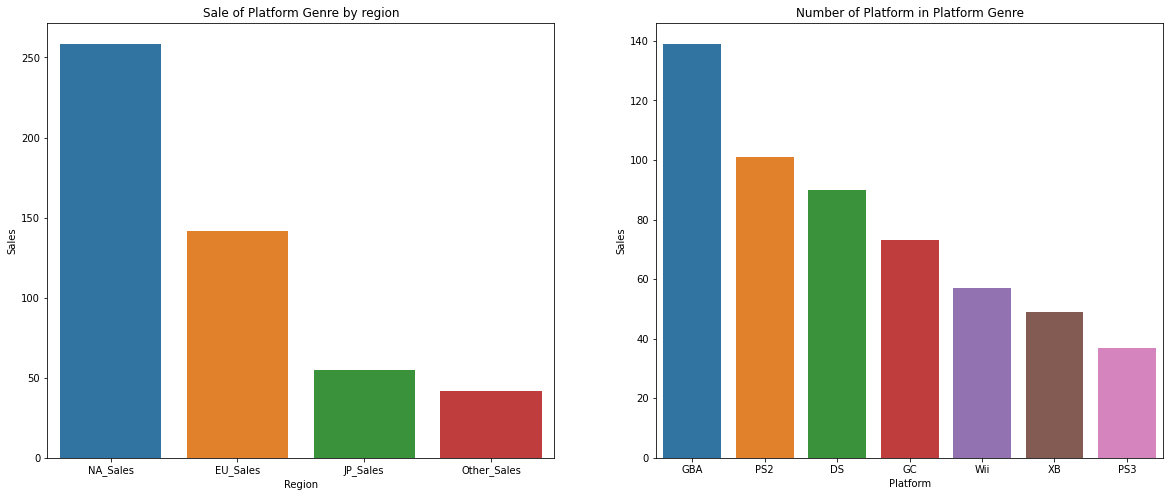

In [41]:
# platform 장르의 2000년 이후 지역별 판매량

platform_genre1 = df[(df.Genre=='Platform')&(df.Year>=2000)].iloc[:,5:9].sum(axis=0)

# platform 장르의 2000년 이후 발매 플랫폼 추이

dfplatplat = df[(df.Genre=='Platform')&(df.Year>=2000)].Platform.value_counts()

plt.figure(figsize=(20,8))

plt.subplot(121)
sns.barplot(x=platform_genre1.index, y=platform_genre1.values)
plt.title('Sale of Platform Genre by region')
plt.xlabel('Region')
plt.ylabel('Sales')

plt.subplot(122)
sns.barplot(x=dfplatplat.index[:7], y=dfplatplat.values[:7])
plt.title('Number of Platform in Platform Genre')
plt.xlabel('Platform')
plt.ylabel('Sales')

plt.show();


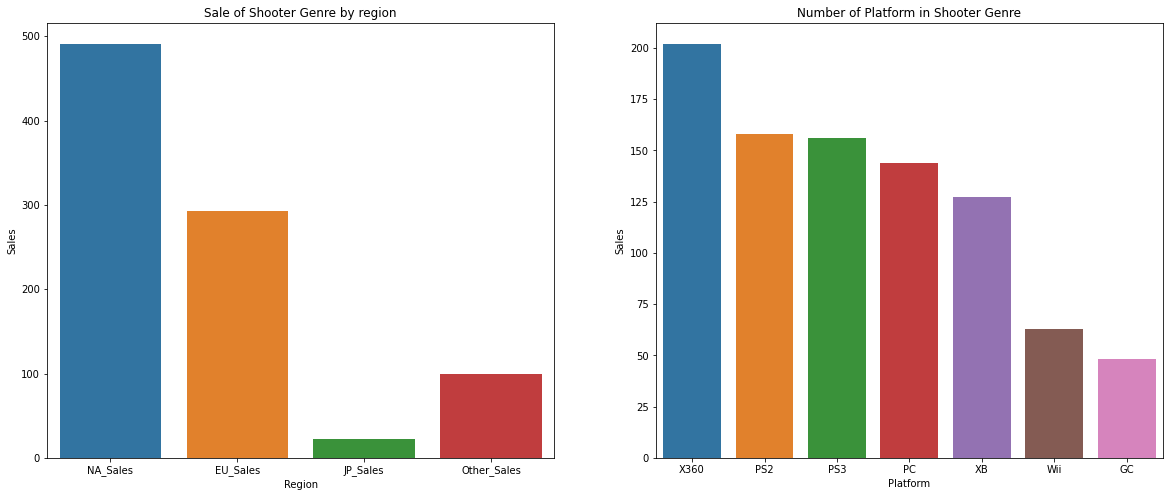

In [42]:
# shooter 장르의 2000년 이후 지역별 판매량

shooter_genre1 = df[(df.Genre=='Shooter')&(df.Year>=2000)].iloc[:,5:9].sum(axis=0)

# shooter 장르의 2000년 이후 발매 플랫폼 추이

dfplatshooter = df[(df.Genre=='Shooter')&(df.Year>=2000)].Platform.value_counts()

plt.figure(figsize=(20,8))

plt.subplot(121)
sns.barplot(x=shooter_genre1.index, y=shooter_genre1.values)
plt.title('Sale of Shooter Genre by region')
plt.xlabel('Region')
plt.ylabel('Sales')

plt.subplot(122)
sns.barplot(x=dfplatshooter.index[:7], y=dfplatshooter.values[:7])
plt.title('Number of Platform in Shooter Genre')
plt.xlabel('Platform')
plt.ylabel('Sales')

plt.show();

### **4. 연도별 출시 플랫폼 비율의 변화**

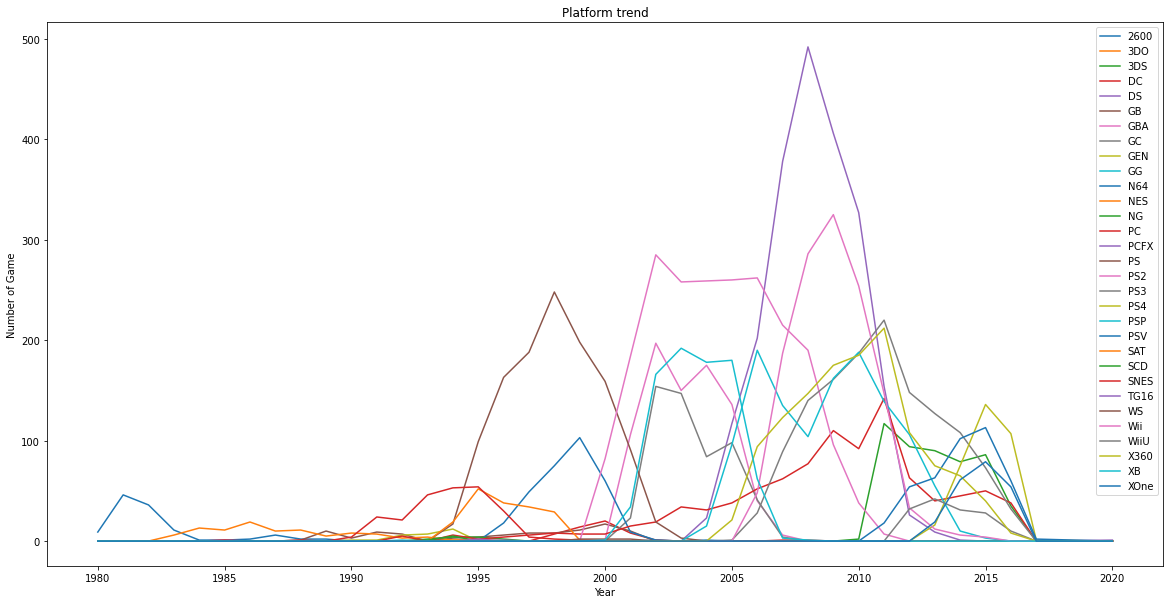

In [43]:
# 각 플랫폼 별 연도에 따른 게임 발매 개수 (플랫폼 시장 지배력)

df_platform_year = df.groupby('Platform')['Year'].value_counts()
df_py = df_platform_year.unstack().fillna(0).T

plt.figure(figsize=(20,10))

plt.plot(df_py)
plt.legend(df_py.columns)
plt.xlabel('Year')
plt.ylabel('Number of Game')
plt.title('Platform trend')
plt.show();

모든 플랫폼의 변화 트렌드를 볼 수 있지만 우리가 원하는 데이터라고 볼 수는 없다.  
스마트폰이 상용화되기 시작한 2010년대 이후 비디오 게임 플랫폼의 변화를 관찰하는것이 좀 더 유의미하다고 판단하였다.

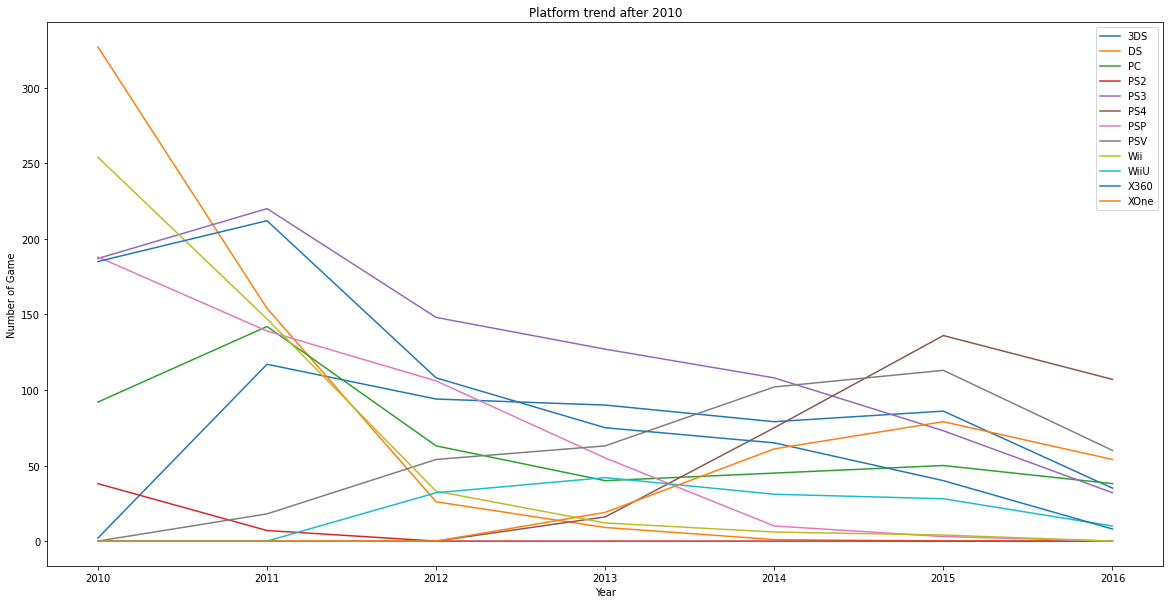

In [44]:
# 2010년 이후 발매량이 0인 플랫폼은 제외

platform_after2010 = df_platform_year.unstack().T.iloc[30:-2].dropna(how='all', axis=1).fillna(0)

# 2010년 이후 플랫폼 트렌드

plt.figure(figsize=(20,10))

plt.plot(platform_after2010)
plt.legend(platform_after2010.columns)
plt.xlabel('Year')
plt.ylabel('Number of Game')
plt.title('Platform trend after 2010')
plt.show();

몇몇 플랫폼은 하향세를 그리거나 아예 그 플랫폼으로 게임이 거의 발매되지 않는 모습을 보여준다.   
이러한 플랫폼은 우리의 고려대상이 아니므로 제외하도록 한다.

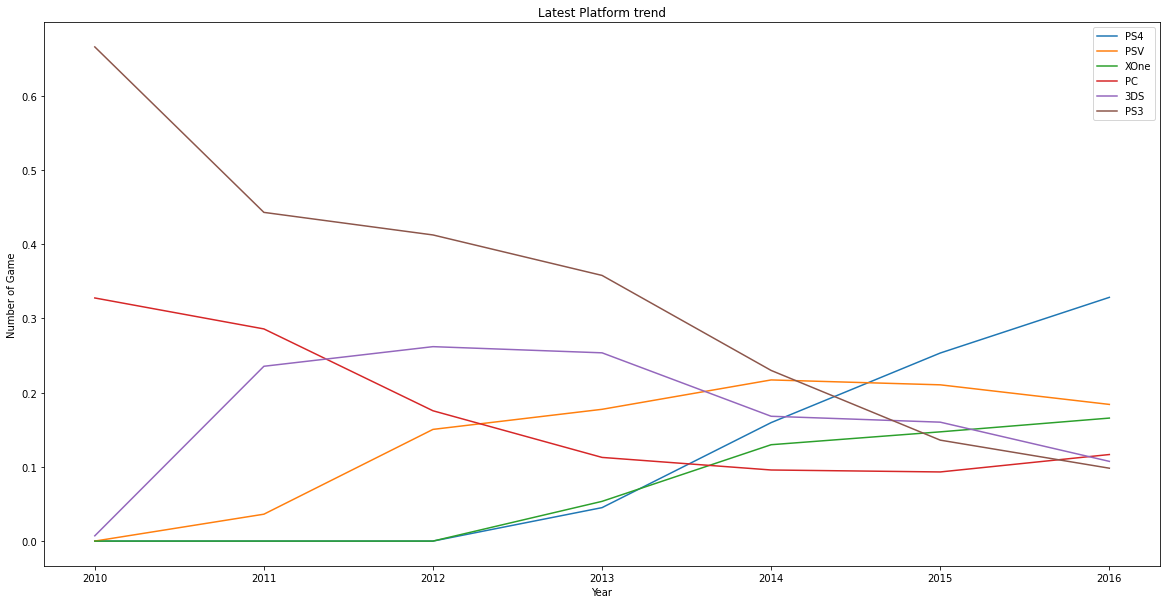

In [45]:
# 4. 연도별 출시 플랫폼 비율의 변화

# 가장 유의미한 최신 연도인 2016년 기준으로 상위 6개 플랫폼의 트렌드 추이

top6_platform_after2010 = platform_after2010[['PS4','PSV','XOne','PC','3DS','PS3']]
p_top6_platform_after2010 = top6_platform_after2010.div(top6_platform_after2010[top6_platform_after2010.columns].sum(axis = 1),axis = 0) # 백분율

plt.figure(figsize=(20,10))

plt.plot(p_top6_platform_after2010)
plt.legend(top6_platform_after2010.columns)
plt.xlabel('Year')
plt.ylabel('Number of Game')
plt.title('Latest Platform trend')
plt.show();

- PS4, XOne가 대체로 상향세를 보이고 있다.
- 구형 게임기인 PS3은 꾸준히 하락하고 있다.
- PSV와 3DS 또한 발매되는 게임수가 둔화되거나 꺾이고 있다.

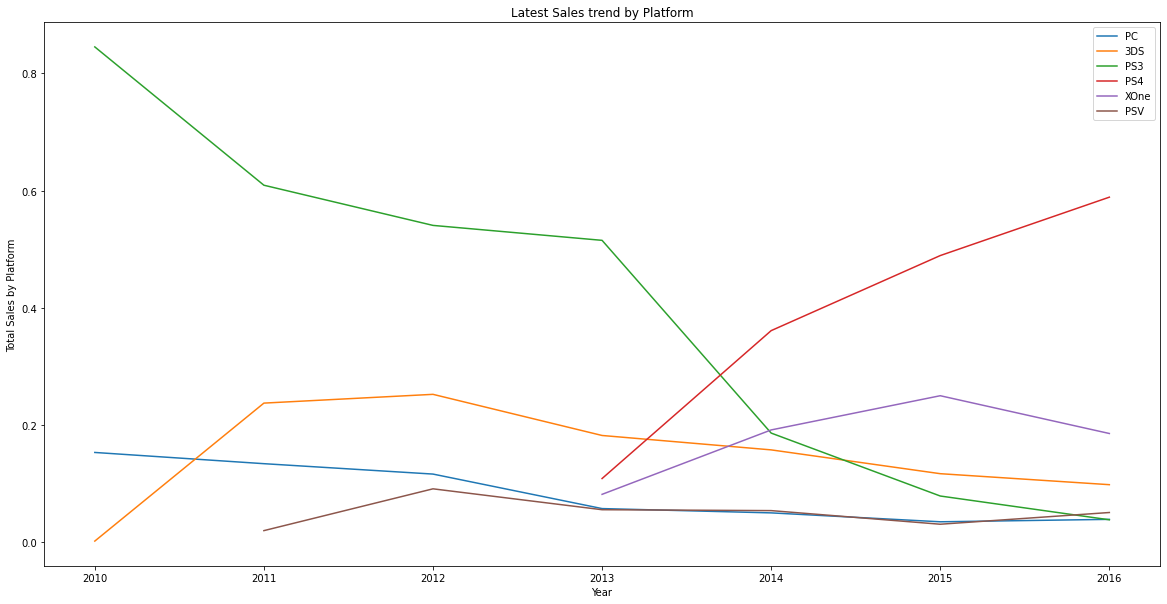

In [46]:
# 2010년 이후 각 주요 플랫폼의 게임 판매량 비율

sum_sale_platform_after2010 = df.groupby(['Year','Platform'])['Total_Sales'].sum().unstack().iloc[30:-2].fillna(0)
top6_sum_sale_platform_after2010 = sum_sale_platform_after2010[['PS4','PSV','XOne','PC','3DS','PS3']]
p_top6_sum_sale_platform_after2010 = top6_sum_sale_platform_after2010.div(top6_sum_sale_platform_after2010[top6_sum_sale_platform_after2010.columns].sum(axis = 1),axis = 0) # 백분율

plt.figure(figsize=(20,10))

plt.plot(p_top6_sum_sale_platform_after2010[['PC','3DS','PS3']])
plt.plot(p_top6_sum_sale_platform_after2010[['PS4','XOne']].iloc[3:])
plt.plot(p_top6_sum_sale_platform_after2010['PSV'].iloc[1:])

plt.legend(['PC','3DS','PS3','PS4','XOne','PSV'])
plt.xlabel('Year')
plt.ylabel('Total Sales by Platform')
plt.title('Latest Sales trend by Platform')
plt.show();

각 플랫폼의 연도별 판매량 Trend를 살펴보면 **PS4가 가장 유망한 Platform**이라고 할 수 있다.

In [47]:
# 2006년 Sports가 유독 높았던 이유

df[(df.Year==2006) & (df.Genre=='Sports')].sort_values('Total_Sales')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,region,series
10305,Winning Eleven: Pro Evolution Soccer 2007,PC,2006,Sports,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,EU,1
180,Rugby 06,XB,2006,Sports,Electronic Arts,0.01,0.00,0.00,0.00,0.01,NA,1
5231,The Hustle: Detroit Streets,XB,2006,Sports,Activision,0.01,0.00,0.00,0.00,0.01,NA,2
9080,Sega Golf Club: Miyazato San Kyoudai Naizou,PS3,2006,Sports,Sega,0.00,0.00,0.01,0.00,0.01,JP,1
7319,LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,EU,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2924,Madden NFL 07,X360,2006,Sports,Electronic Arts,1.66,0.00,0.01,0.13,1.80,NA,1
15420,FIFA Soccer 07,PS2,2006,Sports,Electronic Arts,0.71,2.48,0.03,0.89,4.11,EU,1
12891,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006,Sports,Konami Digital Entertainment,0.10,2.39,1.05,0.86,4.40,EU,1
14757,Madden NFL 07,PS2,2006,Sports,Electronic Arts,3.63,0.24,0.01,0.61,4.49,NA,1


In [48]:
# 2009년 Sports가 유독 높았던 이유

df[(df.Year==2009) & (df.Genre=='Sports')].sort_values('Total_Sales')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,region,series
13954,Pro Evolution Soccer 2010,PC,2009,Sports,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,EU,1
7622,Football Manager Live,PC,2009,Sports,Sega,0.00,0.01,0.00,0.00,0.01,EU,1
5900,Football Academy,DS,2009,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01,EU,1
15476,Championship Manager 2010,PC,2009,Sports,Eidos Interactive,0.00,0.01,0.00,0.00,0.01,EU,1
10326,WSC REAL 09: World Snooker Championship,PS3,2009,Sports,Deep Silver,0.00,0.01,0.00,0.00,0.01,EU,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4820,FIFA Soccer 10,PS3,2009,Sports,Electronic Arts,0.60,2.46,0.05,0.52,3.63,EU,1
9539,EA Sports Active,Wii,2009,Sports,Electronic Arts,2.10,1.36,0.06,0.40,3.92,NA,1
10490,Mario & Sonic at the Olympic Winter Games,Wii,2009,Sports,Sega,1.89,1.99,0.22,0.48,4.58,EU,1
10792,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00,NA,1


- 2000년대 중반 Wii가 엄청난 열풍을 몰고오며 그에 편승한 Wii 기반 Sports 게임이 엄청난 판매량을 기록했다.  
- 2006년, 2009년의 Sports 장르가 Action 장르보다 높았던 이유를 알 수 있었다.

## **2-3. 인기가 많은 게임에 대한 분석**

인기가 많은 게임이란 무엇인가? 여러 기준이 있겠지만 여기서는 두가지 기준을 중점으로 분석하고자 한다.

- 첫번째 기준은 판매량이 높은 게임이다.  
- 또 다른 기준은 재발매가 꾸준히 이루어졌는지이다.

이를 분석하기 위해 `Genre`, `Total_Sales`와 `series` feature를 사용하였다.

최신 트렌드를 반영하기 위해 분석 대상은 2010년 이후로 한정했다.

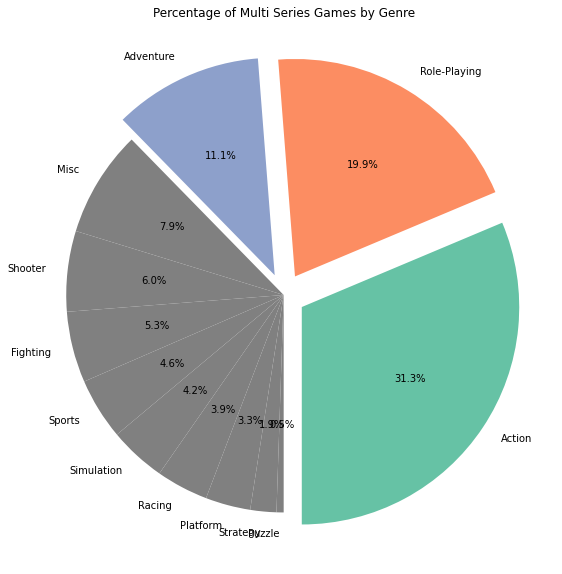

In [49]:
# 1번 이상 재발매된 게임(멀티 시리즈 게임)을 판매량 순으로 나열 (2000년 이후)

df_multi_series = df[(df.series >= 2) & (df.Year>=2010)]
df_multi_series

sum_multi_series = df_multi_series.groupby('Name', as_index=False)['Total_Sales'].sum()
sum_multi_series = sum_multi_series.sort_values('Total_Sales', ascending=False).reset_index(drop=True)

# 멀티 시리즈 게임 판매량 Top 3 장르

df_multi_series_percentage = df_multi_series.Genre.value_counts(normalize=True)

plt.figure(figsize=(10,10))

explode = [0.1 if i < 3 else 0 for i in range(len(df_multi_series_percentage))]
colors = sns.color_palette("Set2", 3) + ['gray']*(len(df_multi_series_percentage)-3)

plt.pie(df_multi_series_percentage, labels=df_multi_series_percentage.index, explode=explode, colors=colors,
        autopct='%1.1f%%', startangle=-90, counterclock=True)

plt.title('Percentage of Multi Series Games by Genre')

plt.show();

Action은 시리즈물에서도 여전히  강세를 보이지만 Role-Playing이 시리즈물로서는 두번째로 큰 비중을 차지했다.  
Role-Playing 장르가 강세였던 일본 지역에서 꾸준한 구매층이 존재한다는 증거이다.

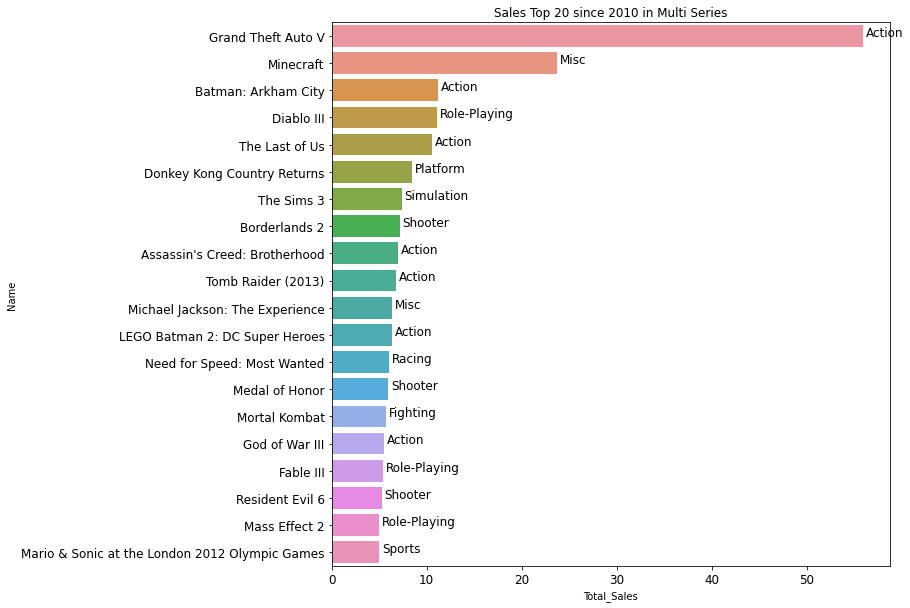

In [50]:
# sum_multi_series에서 Genre 포함

sum_multi_series2 = df_multi_series.groupby(['Name','Genre'], as_index=False)['Total_Sales'].sum()
sum_multi_series2 = sum_multi_series2.sort_values('Total_Sales', ascending=False).reset_index(drop=True)

# 멀티 시리즈 게임 판매량 Top 20 순위

plt.figure(figsize=(10,10))
plt.title('Sales Top 20 since 2010 in Multi Series')
sns.barplot(x=sum_multi_series2.Total_Sales[0:20], y=sum_multi_series2.Name[0:20])

idx = 0
for value in sum_multi_series2['Total_Sales'][0:20]:
    plt.text(value+0.3, idx, str(sum_multi_series2[0:20].Genre.iloc[idx]), color ='black', size=12)
    idx += 1

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show();

전 세계적으로 히트했던 게임 **'GTA(Grand Theft Auto V)'** 가 압도적인 판매량을 자랑하고 있다.   
Action 게임을 만든다면 GTA를 벤치마킹 하는것도 전략일 수 있다.

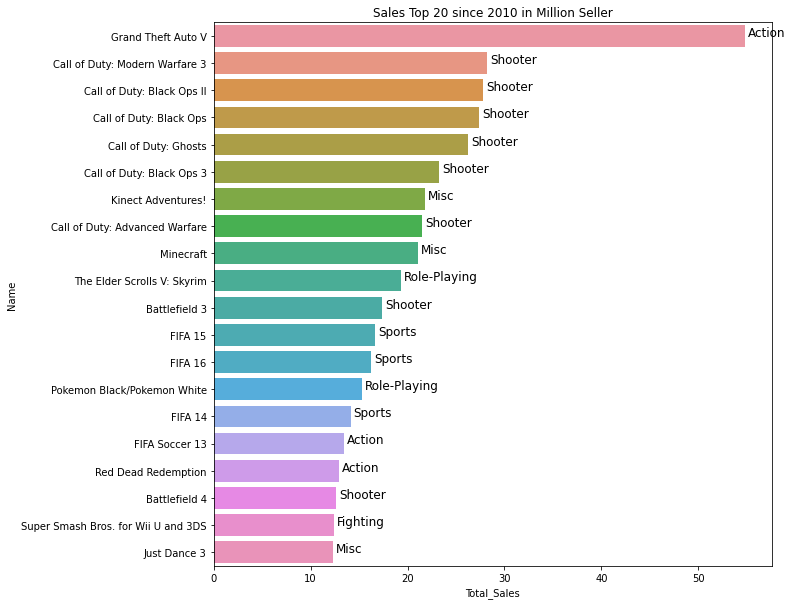

In [51]:
# 각 지역에서 밀리언 셀러를 기록한 게임 (2010년 이후)

df_mil_2010 = df_mil[['Name','Genre','Total_Sales']]
df_mil_2010 = df_mil_2010[df_mil.Year>=2010].sort_values('Total_Sales', ascending=False).reset_index(drop=True)
df_mil_2010_genre = df_mil_2010.groupby(['Name','Genre'])['Total_Sales'].sum().to_frame().sort_values('Total_Sales', ascending=False).reset_index()

plt.figure(figsize=(10,10))
plt.title('Sales Top 20 since 2010 in Million Seller')
sns.barplot(x=df_mil_2010_genre.Total_Sales[0:20], y=df_mil_2010_genre.Name[0:20])

idx = 0
for value in df_mil_2010_genre['Total_Sales'][0:20]:
    plt.text(value+0.3, idx, str(df_mil_2010_genre[0:20].Genre.iloc[idx]), color ='black', size=12)
    idx += 1

plt.show();

'Shooter' 장르에서는 **'Call of Duty'** 시리즈를 벤치마킹하는게 좋다고 판단된다.  
'Role-Playing' 장르는 **Diablo, Skyrim, Pokemon** 등 다양한 시리즈에서 골고루 흥행이 나타나고 있다.
<br>  
Action과 Shooting의 대표적인 인기 게임을 하나씩 가져와 공통점을 찾아보자.    
흥행한 Role-Playing 게임 간에는 어떤 공통점이 있는지 찾아보자.


### **Case 1. Grand Theft Auto 시리즈**

In [52]:
# 2010년 이후 발매된 GTA 시리즈

df_GTA = df[df.Name.str.contains('Grand Theft Auto') & (df.Year >= 2010)]
df_GTA

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,region,series
1992,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99,EU,3
3451,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,EU,3
10729,Grand Theft Auto V,XOne,2014,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08,NA,3
10806,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,NA,3
16397,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08,EU,3


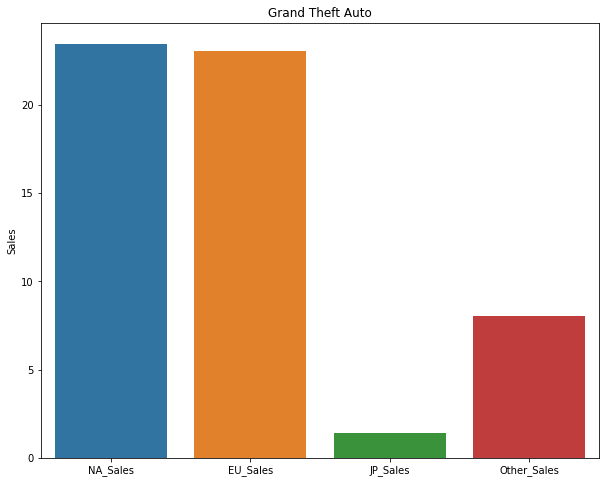

In [53]:
df_GTA_Sales = df_GTA.iloc[:,5:9].sum(axis=0)

plt.figure(figsize=(10,8))

sns.barplot(x=df_GTA_Sales.index, y=df_GTA_Sales.values)

plt.title('Grand Theft Auto')
plt.ylabel('Sales')
plt.show();

In [54]:
# 'Grand Theft Auto V' 연도별 플랫폼 비율

df_GTA_prop_platform = df_GTA.groupby(['Year','Platform'])['Total_Sales'].sum().unstack().fillna(0)
df_GTA_prop_platform['PS'] = df_GTA_prop_platform[['PS3','PS4']].sum(axis=1)
df_GTA_prop_platform['XBOX'] = df_GTA_prop_platform[['X360','XOne']].sum(axis=1)
df_GTA_prop_platform = df_GTA_prop_platform.drop(['PS3','PS4','X360','XOne'], axis=1)
df_GTA_prop_platform2 = df_GTA_prop_platform.div(df_GTA_prop_platform[df_GTA_prop_platform.columns].sum(axis = 1),axis = 0).round(2)

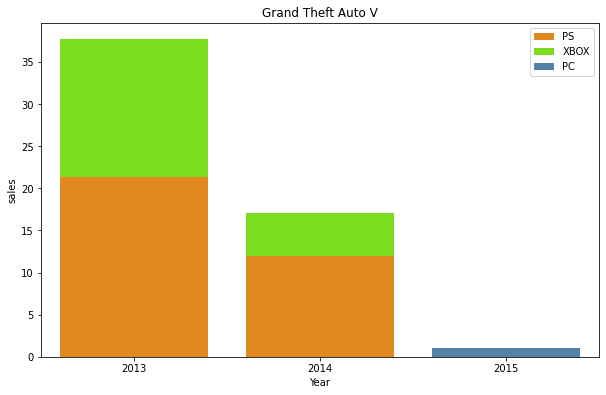

In [55]:
plt.figure(figsize=(10,8))

sns.barplot(x=df_GTA_prop_platform.index, y=df_GTA_prop_platform.PS, label = 'PS', color = '#FF8C00')
sns.barplot(x=df_GTA_prop_platform.index, y=df_GTA_prop_platform.XBOX, bottom = df_GTA_prop_platform.PS, label = 'XBOX', color = '#7CFC00')
sns.barplot(x=df_GTA_prop_platform.index, y=df_GTA_prop_platform.PC, label = 'PC', color = 'steelblue')

plt.legend()
plt.subplots_adjust(bottom=0.3)
plt.gca().set_xticklabels(df_GTA_prop_platform.index)
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))
plt.gca().set_ylabel('sales')

plt.title('Grand Theft Auto V')
plt.show();

2010년 이후 발매된 GTA 시리즈는 Grand Theft Auto V가 유일하다. 2013, 2014, 2015년 세번에 걸쳐 재발매 되었으나 연도가 지날수록 매출은 감소하였고 특히 세번째 발매는 PC라는 플랫폼의 한계까지 포함해 크게 감소했음을 알 수 있다.

### **Case 2. Call of Duty 시리즈**



In [56]:
# 2010년 이후 발매된 CoD 시리즈

df_CoD = df[df.Name.str.contains('Call of Duty') & (df.Year >= 2010)]
df_CoD

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,region,series
469,Call of Duty: Advanced Warfare,PS3,2014,Shooter,Activision,1.54,1.94,0.19,0.77,4.44,EU,1
860,Call of Duty: Ghosts,PC,2013,Shooter,Activision,0.23,0.41,0.00,0.09,0.73,EU,1
2772,Call of Duty: Modern Warfare Trilogy,X360,2016,Shooter,Activision,0.01,0.01,0.00,0.00,0.02,NA,1
2786,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,NA,1
3433,Call of Duty: Modern Warfare Trilogy,PS3,2016,Shooter,Activision,0.00,0.01,0.00,0.00,0.01,EU,1
4198,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04,EU,1
4939,Call of Duty: Modern Warfare 3,Wii,2011,Shooter,Activision,0.60,0.21,0.00,0.08,0.89,NA,1
5215,Call of Duty: The War Collection,X360,2010,Shooter,Activision,0.05,0.00,0.00,0.00,0.05,NA,1
5548,Call of Duty: Ghosts,X360,2013,Shooter,Activision,6.72,2.63,0.04,0.82,10.21,NA,1
5616,Call of Duty: Ghosts,WiiU,2013,Shooter,Activision,0.23,0.09,0.01,0.03,0.36,NA,1


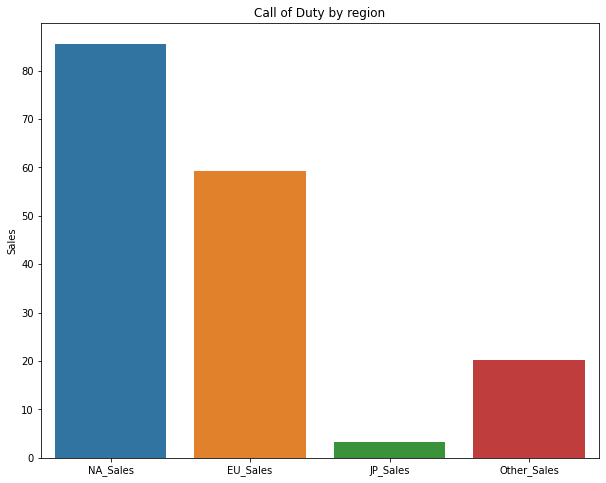

In [57]:
# CoD 지역별 판매량

df_CoD_Sales = df_CoD.iloc[:,5:9].sum(axis=0)

plt.figure(figsize=(10,8))
plt.ylabel('Sales')
sns.barplot(x=df_CoD_Sales.index, y=df_CoD_Sales.values)

plt.title('Call of Duty by region')
plt.show();

In [58]:
# 'Call of Duty' 연도별 플랫폼 비율

df_CoD_prop_platform = df_CoD.groupby(['Year','Platform'])['Total_Sales'].sum().unstack().fillna(0)
df_CoD_prop_platform['PS'] = df_CoD_prop_platform[['PS3','PS4']].sum(axis=1)
df_CoD_prop_platform['XBOX'] = df_CoD_prop_platform[['X360','XOne']].sum(axis=1)
df_CoD_prop_platform['Others'] = df_CoD_prop_platform[['Wii','WiiU','DS','PSV','PC']].sum(axis=1)
df_CoD_prop_platform = df_CoD_prop_platform.drop(['PS3','PS4','X360','XOne','Wii','WiiU','DS','PSV','PC'], axis=1)
df_CoD_prop_platform2 = df_CoD_prop_platform.div(df_CoD_prop_platform[df_CoD_prop_platform.columns].sum(axis = 1),axis = 0).round(2)

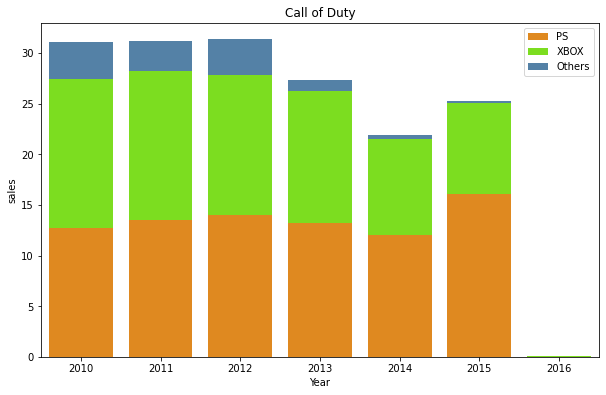

In [59]:
plt.figure(figsize=(10,8))

sns.barplot(x=df_CoD_prop_platform.index, y=df_CoD_prop_platform.PS, label = 'PS', color = '#FF8C00')
sns.barplot(x=df_CoD_prop_platform.index, y=df_CoD_prop_platform.XBOX, bottom = df_CoD_prop_platform.PS, label = 'XBOX', color = '#7CFC00')
sns.barplot(x=df_CoD_prop_platform.index, y=df_CoD_prop_platform.Others, bottom = df_CoD_prop_platform.PS+df_CoD_prop_platform.XBOX, label = 'Others', color = 'steelblue')

plt.legend()
plt.subplots_adjust(bottom=0.3)
plt.gca().set_xticklabels(df_CoD_prop_platform.index)
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.0f'))
plt.gca().set_ylabel('sales')

plt.title('Call of Duty')
plt.show();

PS와 XBOX기반 플랫폼을 중심으로 꾸준히 팔린 작품이다.

### **Case 3. Diablo, Skyrim, Pokemon etc...**

In [60]:
# 2000년 이후 발매된 Diablo 시리즈

df_Dia = df[df.Name.str.contains('Diablo') & (df.Year >= 2010)]
df_Dia

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,region,series
1459,Diablo III,XOne,2014,Role-Playing,Activision,0.35,0.24,0.00,0.05,0.64,NA,3
6779,Diablo III,X360,2013,Role-Playing,Activision,0.89,0.44,0.00,0.12,1.45,NA,3
10329,Diablo III,PC,2012,Role-Playing,Activision,2.43,2.15,0.00,0.62,5.20,NA,3
11911,Diablo III,PS4,2014,Role-Playing,Activision,0.49,0.88,0.06,0.30,1.73,EU,3
15936,Diablo III,PS3,2013,Role-Playing,Activision,0.71,0.83,0.15,0.35,2.04,EU,3


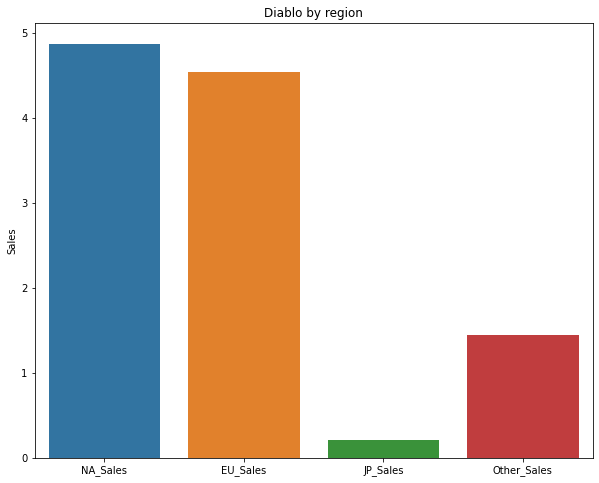

In [61]:
df_Dia_Sales = df_Dia.iloc[:,5:9].sum(axis=0)

plt.figure(figsize=(10,8))
plt.ylabel('Sales')
sns.barplot(x=df_Dia_Sales.index, y=df_Dia_Sales.values)

plt.title('Diablo by region')
plt.show();

In [62]:
df_Elder = df[df.Name.str.contains('Elder Scrolls') & (df.Year >= 2010)]
df_Elder

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,region,series
1625,The Elder Scrolls V: Skyrim,PC,2011,Role-Playing,Bethesda Softworks,1.15,2.09,0.00,0.64,3.88,EU,1
6041,The Elder Scrolls V: Skyrim,PS3,2011,Role-Playing,Bethesda Softworks,2.55,2.71,0.25,1.05,6.56,EU,1
11404,The Elder Scrolls V: Skyrim,X360,2011,Role-Playing,Bethesda Softworks,5.03,2.86,0.10,0.85,8.84,NA,1
14525,The Elder Scrolls Online,PC,2014,Role-Playing,Bethesda Softworks,0.32,0.48,0.00,0.09,0.89,EU,2
14831,The Elder Scrolls Online,XOne,2015,Role-Playing,Bethesda Softworks,0.77,0.38,0.00,0.12,1.27,NA,2
16133,The Elder Scrolls Online,PS4,2015,Role-Playing,Bethesda Softworks,0.66,0.78,0.00,0.28,1.72,EU,2


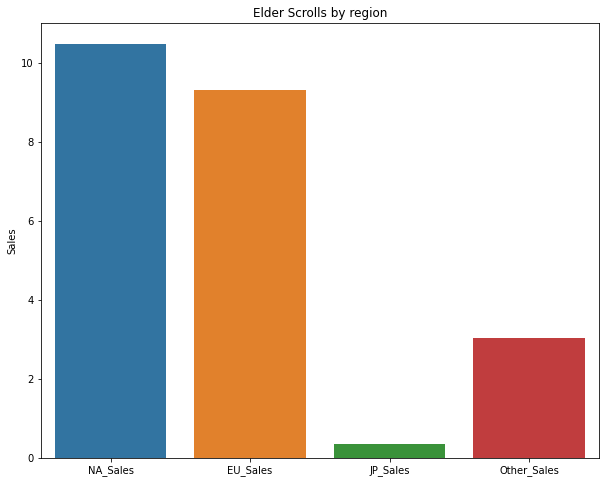

In [63]:
df_Elder_Sales = df_Elder.iloc[:,5:9].sum(axis=0)

plt.figure(figsize=(10,8))
plt.ylabel('Sales')
sns.barplot(x=df_Elder_Sales.index, y=df_Elder_Sales.values)

plt.title('Elder Scrolls by region')
plt.show();

In [64]:
df_Pok = df[df.Name.str.contains('Pokemon') & (df.Year >= 2010)]
df_Pok

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,region,series
1239,Pokemon Conquest,DS,2012,Role-Playing,Nintendo,0.58,0.06,0.37,0.04,1.05,NA,1
1419,Pokemon Art Academy,3DS,2014,Misc,Nintendo,0.18,0.12,0.16,0.03,0.49,NA,1
1797,Pokemon Rumble Blast,3DS,2011,Action,Nintendo,0.47,0.26,0.35,0.07,1.15,NA,1
4048,Pokemon Ranger: Guardian Signs,DS,2010,Role-Playing,Nintendo,0.51,0.17,0.58,0.06,1.32,JP,1
4209,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33,NA,1
7763,Pokemon Mystery Dungeon: Gates to Infinity,3DS,2012,Role-Playing,Nintendo,0.44,0.30,0.47,0.06,1.27,JP,1
10517,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32,JP,1
11595,Pokemon Rumble World,3DS,2015,Action,Nintendo,0.00,0.01,0.08,0.00,0.09,JP,1
15383,Pokemon Super Mystery Dungeon,3DS,2015,Role-Playing,Nintendo,0.46,0.31,0.33,0.08,1.18,NA,1
15506,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,Nintendo,2.91,1.86,3.14,0.43,8.34,JP,1


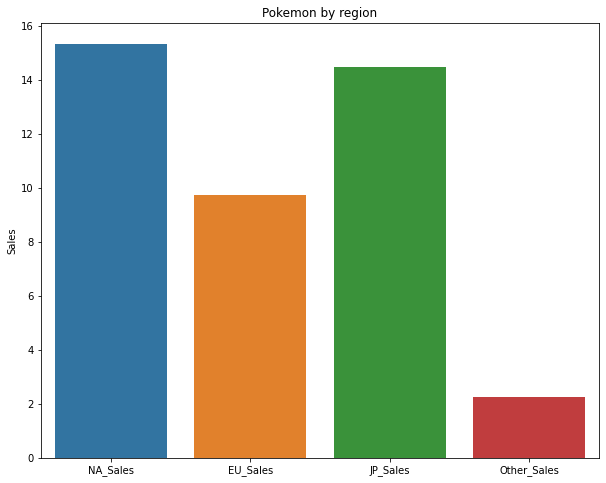

In [65]:
df_Pok_Sales = df_Pok.iloc[:,5:9].sum(axis=0)

plt.figure(figsize=(10,8))
plt.ylabel('Sales')
sns.barplot(x=df_Pok_Sales.index, y=df_Pok_Sales.values)

plt.title('Pokemon by region')
plt.show();

3가지를 비교해본 결과 의외로 상위권 매출 Role-Playing 게임이라고 전부 일본 지역 판매량이 높은 것은 아니었다. 다만 Pokemon 처럼 Nintendo Platform으로 출시되는 경우에는 일본 지역의 판매량이 높게 나오는 것을 볼 수 있었다. 

In [66]:
df_rpg = df[(df.Genre=='Role-Playing') & (df.Year >= 2010)]
df_rpg_DS = df_rpg[df_rpg.Platform.str.contains('DS')]

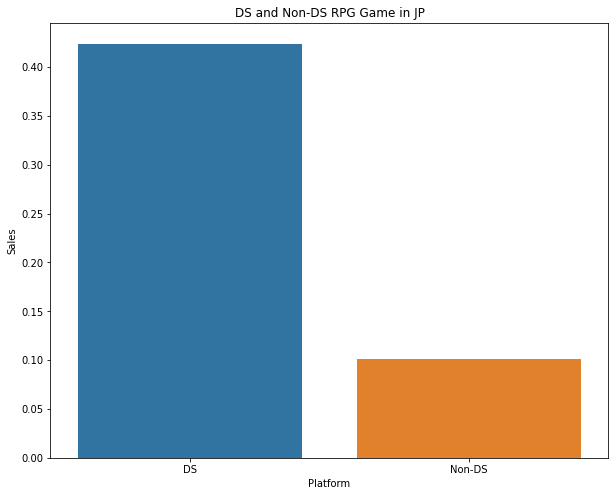

In [67]:
# DS 기반과 아닌 플랫폼간 JP 지역에서 평균 RPG 판매량 차이

dsmean = df_rpg_DS.JP_Sales.mean()
df_rpg_noDS = df_rpg.drop(df_rpg_DS.index, axis=0)
nodsmean = df_rpg_noDS.JP_Sales.mean()

plt.figure(figsize=(10,8))

sns.barplot(x=['DS','Non-DS'], y=[dsmean, nodsmean])

plt.title('DS and Non-DS RPG Game in JP')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.show();

In [68]:

# t-test를 통해 DS 플랫폼 기반의 rpg가 일본에서 더 판매량이 높게 나오는지 검정
df_rpg.JP_Sales
df_rpg_DS.JP_Sales

print('---'*20, '\n')
print(levene(df_rpg.JP_Sales, df_rpg_DS.JP_Sales),'\n') # CLT에 의해 정규성 가정, but 등분산성 가정 위배
print('---'*20, '\n')

# 등분산성을 만족하지 못하는 2개의 그룹에 대한 ttest_ind()에는 equal_var=False 옵션을 추가.

print('DS 기반 RPG가 일본에서 더 판매량이 높게 나오는지에 대한 t-test의 p-value :',ttest_ind(df_rpg.JP_Sales, df_rpg_DS.JP_Sales, equal_var=False, alternative='less').pvalue, '\n')


------------------------------------------------------------ 

LeveneResult(statistic=16.05167141266763, pvalue=6.844989082965696e-05) 

------------------------------------------------------------ 

DS 기반 RPG가 일본에서 더 판매량이 높게 나오는지에 대한 t-test의 p-value : 0.0008417235214449065 



p-value < 0.05 이므로 신뢰구간 95% 기준으로 **DS 플랫폼 기반의 rpg가 일본에서 더 평균 판매량이 높게 나온다고 할 수 있다.**

# **Part 3. Business Insight and Conclusion**  

  ## **3-1. 도출된 Business Insight 정리**
  

- **1.지역에 따른 게임 장르의 관계**  
  - **지역에 따라 게임 장르의 수요에는 차이가 있음을 알 수 있었다.**  
  - 따라서 특정 지역을 공략하기 위해서 선택 가능한 전략의 폭을 좁힐 수 있다.
  - **일본 지역에서는 RPG 장르가, 나머지 장르에서는 Action 장르가 강세**였다.
  - 백만장 이상 팔린 게임을 한정해서 보면 Others 지역은 Sports가 제일 강세이고 일본 지역은 RPG가 더 뚜렷한 강세를 보였다.
  - Others는 제일 잘 팔린 게임 중 백만장 이상 팔린 게임의 장르 숫자가 다른 지역보다 적다. 
2. **연도에 따른 장르/플랫폼 트렌드**
  - 2000년 이전에는 다양한 장르가 유행했지만 **2000년 이후에는 대부분 Action 게임이 강세**를 보였다. 
  - 출시되는 숫자도, 총 판매량도 Action이 강세였는데 Wii가 히트쳤던 기간에는 Sports가 잠시 높은 수치를 보였다.
  - 평균 판매량으로 보자면 2000년대 이후 평균 판매량에서는 'Action'이 최고 판매량을 기록하지 못하고  **Role-Playing이나 Platform, Shooter 게임이 상위**를 차지했다.
  - **발매되는 게임 숫자는 적지만 꾸준히 구매해주는 구매층이 존재하는 게임들**이라고 볼 수 있으며, 회사 전략에 따라 이를 틈새 시장으로 삼을 수 있다.
  - Action 장르는 너무 많은 게임이 발매되어 수요가 그만큼 분산되는 레드오션 시장이라고 볼 수 있다.
  - 각 플랫폼의 연도별 판매량 Trend를 살펴보면 **PS4가 가장 유망한 Platform**이라고 할 수 있다.

3. **인기 사례들에 대한 분석**
  - GTA 나 CoD 같은 히트 게임도 일본 시장에서는 힘을 쓰지 못한다.
  - 따라서 일본시장에 진출할 때는 Action이나 Shooting 게임을 출시하는 것은 좋은 전략이 아니다.
  - Role-Playing 장르는 반드시 일본에서만 흥하는 것이 아니다.
  - 하지만 **일본에서 Role-Playing 게임을 발매할 때는 DS 기반의 플랫폼으로 출시하는것이 더 판매량이 높다**고 할 수 있다.

## **3-2. 결론 : 어떤 게임을 설계해야 하는가?** 

이 분석은 어디까지나 Global한 시장을 대상으로 한 분석이기 때문에 국내를 대상으로 한 영세 게임사에는 맞지 않다.   
따라서 해외 진출을 충분히 노릴 수 있는 규모의 회사라고 가정하겠다.

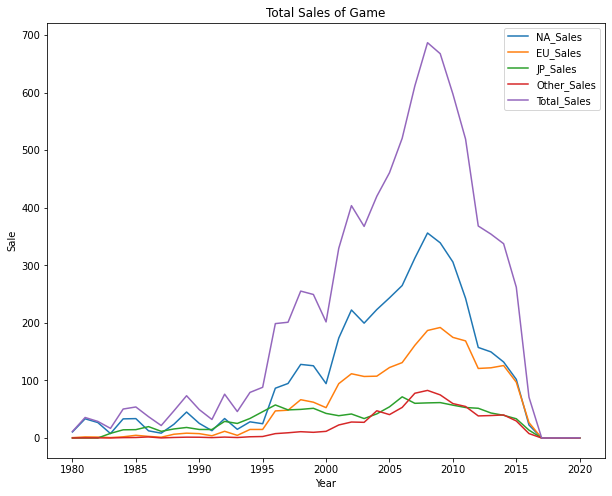

In [69]:
# 연도별 지역마다 게임 시장 크기의 동향

df_yss = df.groupby('Year').sum()

plt.figure(figsize=(10, 8))
plt.plot(df_yss.iloc[:,0:-1])
plt.legend(df_yss.columns)
plt.title('Total Sales of Game')
plt.xlabel('Year')
plt.ylabel('Sale')
plt.show();

역대 게임의 판매량 추이를 보면 북미 게임 시장이 제일 크고, 그 다음 유럽, 일본 시장과 나머지 시장은 거의 비슷한 파이를 가지고 있다.

따라서 기본적으로 트렌드가 이질적인 일본 시장을 배제하고 나머지 시장을 노리는 것이 합리적인 전략이다.

다만 지리적 거리, 문화적 동질성 등으로 인해 한국에서 만든 게임으로 일본에 진출할 때 다른 지역에 비해 더 성공한 가능성이 높을 수도 있다.

따라서 여기 세가지 전략을 제시하고자 한다.

**strategy 1 : 대세를 따르겠다**

지역 : 북미, 유럽, 기타

장르 : Action 또는 Sports(기타 지역)

플랫폼 : PS4 로 출시 후 흥행하면 XBOX 로 멀티 플랫폼을 고려한다

**strategy 2: 틈새시장을 찾겠다**

지역 : Platform 장르는 지역 불문, Shooter 장르는 일본 제외

장르 : Platform 또는 Shooter

플랫폼 : Platform 장르는 DS, Shooter 게임은 XBOX, PS, PC 계열로 출시 

**strategy 3: 일본 시장을 공략하겠다**

지역 : 일본

장르 : Role-Playing

플랫폼 : DS 계열(Nintendo 게임기)